In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC

In [2]:
features=pd.read_csv("features.csv",index_col=0)

In [3]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835 entries, 0 to 834
Columns: 520 entries, 0 to Name
dtypes: float64(519), int64(1)
memory usage: 3.3 MB


In [4]:
X=features.iloc[:,:-1]
y=features.iloc[:,-1]

In [5]:
#SVC_Linear=SVC(kernel="linear")
#SVC_RBF=SVC(kernel="rbf",gamma="scale")
#SVC_POLY=SVC(kernel="poly",gamma="scale")
#SVC_Sigmoid=SVC(kernel="sigmoid",gamma="scale")
#LR=LogisticRegression()
RandomForest=RandomForestClassifier(n_estimators=20,criterion="entropy")

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Fitting on train test split to get conf matrix etc

In [7]:
RandomForest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [8]:
y_pred=RandomForest.predict(X_test)

In [9]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       1.00      1.00      1.00        23
           2       0.96      1.00      0.98        24
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        35

   micro avg       0.99      0.99      0.99       167
   macro avg       0.99      0.99      0.99       167
weighted avg       0.99      0.99      0.99       167



In [10]:
print(confusion_matrix(y_test,y_pred))

[[20  0  1  0  0  0]
 [ 0 23  0  0  0  0]
 [ 0  0 24  0  0  0]
 [ 0  0  0 40  0  0]
 [ 0  0  0  0 24  0]
 [ 0  0  0  0  0 35]]


In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9940119760479041


## Fitting on X, y to predict using images

In [12]:
RandomForest.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
test_path="Data/Testing"
flower_names=['Carnation','Cherry Blossom','Daisy','Lilly','Orchid','Rose']

In [14]:
import mahotas
def fe_hu_moments(image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    feature=cv2.HuMoments(cv2.moments(image)).flatten()
    return feature
def fe_color_hist(image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    hist=cv2.calcHist([image],[0,1,2],None,[8,8,8],[0,256,0,256,0,256])
    cv2.normalize(hist,hist)
    return hist.flatten()
def fe_haralick(image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    haralick=mahotas.features.haralick(image).mean(axis=0)
    return haralick

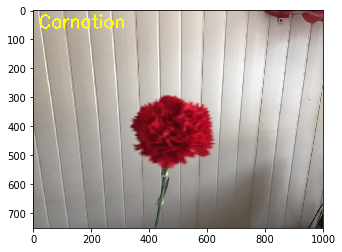

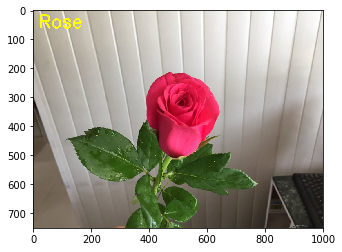

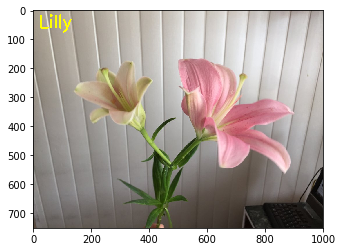

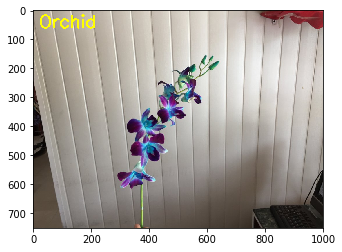

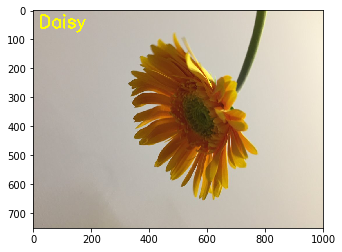

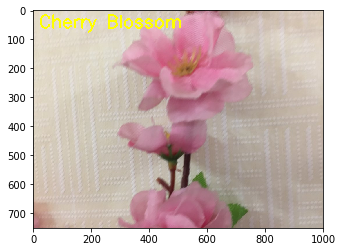

In [15]:
for i in os.listdir(test_path):
    test_img=cv2.imread(test_path+'/'+str(i))
    hu_moment=fe_hu_moments(test_img)
    color_hist=fe_color_hist(test_img)
    #haralick=fe_haralick(test_img)
    test_image_features=np.hstack([hu_moment,color_hist])
    test_image_features=test_image_features.reshape(1,-1)
    pred=RandomForest.predict(test_image_features)[0]
    cv2.putText(test_img, flower_names[pred], (20,60), cv2.FONT_HERSHEY_SIMPLEX, 2.0, (0,255,255),5)
    plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
    plt.show()

In [16]:
rf_acc=cross_val_score(RandomForest,X,y,cv=10).mean()
print(rf_acc)

0.9988505747126437
